# 구글 드라이브와 연동

In [1]:
from google.colab import drive
import os

if os.path.exists('/content/gdrive')==False:
    drive.mount('/content/gdrive')
    print('Google Drive is mounted\n')
else:
    print('Google Drive is already mounted\n')
  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Google Drive is mounted



# 라이브러리 import

In [0]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import IPython
import os
import numpy as np
from sklearn.preprocessing import normalize
%matplotlib inline

# 데이터 로드

In [4]:
# 데이터 로드

base_path = '/content/gdrive/My Drive/number/'

# 하위경로를 가져옴
files = os.listdir('/content/gdrive/My Drive/number/')

# 하위경로의 순서가 섞여 있어 재정의
files = ['zero.wav', 'one.wav', 'two.wav', 'three.wav', 'four.wav', 'five.wav', 'six.wav', 'seven.wav', 'eight.wav', 'nine.wav']

# { "zero.wav": {"sample_rate": 8000, "samples": [...]},
#   "one.wav": {"sample_rate": 8000, "samples": [...]},
#   ...
#   "nine.wav": {"sample_rate": 8000, "samples": [...]}}

sample_dict = {f: {'sample_rate': wavfile.read(base_path + f)[0], 'samples': wavfile.read(base_path + f)[1]} for f in files}

print("data load complete")


data load complete


# #정규화1 : 가장 큰값을 가지는 수로 전체를 나누어 줌


In [5]:
#정규화1 : 가장 큰값을 가지는 수로 전체를 나누어 줌

#공백 리스트
normal_file = list()

#sample_dict를 복사함
normaldict=dict(sample_dict)

for i in files:
  x_n = sample_dict[i]['samples']
  
  print("원래의 데이터")
  print(x_n)
  
  #기존 데이터의 길이
  length = len(x_n)
  
  temp_absmax = 0
  temp_max = 0
  temp_min = 0
  
  #처음부터 끝가지 반복문을 돌며 최대값을 찾아줌
  for j in range(0,length):
    
    #최대값이 양수일때
    temp_max = np.maximum(sample_dict[i]['samples'][j],temp_max)
    
    #최대값이 음수일때
    temp_min = np.minimum(sample_dict[i]['samples'][j],temp_min)
    
    #최대 양수 최소 음수의 절대값을 비교하여 가장큰 절대값을 찾아줌
    temp_absmax = np.maximum(temp_max, abs(temp_min))
  
  #반복문을 돌며 가장큰 절대값으로 나누어주며 list에 추가
  for j in range(0,length):
    normal_file.append(sample_dict[i]['samples'][j]/ temp_absmax)
  
  print()
  print("정규화된 데이터")
  print(normal_file)
  print()
  
  #normaldict에 업데이트
  normaldict.update({i:{'sample_rate':8000, 'samples':normal_file}})
  
  #리스트 초기화
  normal_file = list()

#값이 들어갔는지 확인
print(normaldict)

# { "zero.wav": {"sample_rate": 8000, "samples": [...]},

원래의 데이터
[  -5  126   65 ... -172  -78  -21]

정규화된 데이터
[-0.0006074596039363382, 0.015307982019195723, 0.007896974851172398, 0.0024298384157453528, 0.014214554732110314, 0.009719353662981411, 0.006682055643299721, 0.010812780950066821, 0.010934272870854089, 0.021018102296197303, 0.029887012513667842, 0.021625561900133643, 0.0021868545741708175, 0.03620459239460576, 0.017373344672579272, 0.008625926375896003, 0.01603693354391933, 0.005102660673065241, 0.025999271048475277, 0.03912039849350018, 0.034260721662009476, 0.056979710849228524, 0.06341878265095371, 0.05673672700765399, 0.06001700886891022, 0.03608310047381849, 0.027821649860284292, 0.013364111286599442, -0.02320495687036812, -0.03851293888956384, -0.052363017859312355, -0.06973636253189162, -0.05989551694812295, -0.07702587777912769, -0.06815696756165715, -0.04227918843396914, -0.03620459239460576, -0.01445753857368485, 0.01956019924675009, 0.03207386708783866, 0.06475519377961365, 0.06536265338354999, 0.05673672700765399, 0.0653

# **정규화2 : sklearn의 nomalize 함수 이용**

In [0]:
  #정규화2 : sklearn의 nomalize 함수 이용

#공백 리스트 생성
normal_file=list()

#반복문을 통해 리스트에 정규화된 값을 넣어줌
for i in files:
  x_n = sample_dict[i]['samples']  
  x_n=x_n.reshape(1,-1)  
  x_n=normalize(x_n)  
  normal_file.append(x_n)


#normalize_dict 에 기존 sample_dict 과 동일한 값을 넣어줌
normalize_dict= dict(sample_dict)

#값이 들어갔는지 확인
print(normalize_dict)

#연산을 위한 testdict 생성
testdict = dict(normalize_dict)

#반복문을 통해 'samples' 값을 정규화된 값으로 update
testdict.update({f:{'sample_rate':8000, 'samples':normal_file[files.index(f)]} for f in files})

#값이 들어갔는지 확인
print(testdict)



{'zero.wav': {'sample_rate': 8000, 'samples': array([  -5,  126,   65, ..., -172,  -78,  -21], dtype=int16)}, 'one.wav': {'sample_rate': 8000, 'samples': array([ -25,   19,   75, ..., -190, -162, -127], dtype=int16)}, 'two.wav': {'sample_rate': 8000, 'samples': array([-21, -46, -64, ...,  20,   6, -16], dtype=int16)}, 'three.wav': {'sample_rate': 8000, 'samples': array([-117,  -98, -116, ..., -135,  -91,  -99], dtype=int16)}, 'four.wav': {'sample_rate': 8000, 'samples': array([-183,  -76, -142, ...,   22,   27,   27], dtype=int16)}, 'five.wav': {'sample_rate': 8000, 'samples': array([ 35,  -3, -44, ..., -15,  -2, -15], dtype=int16)}, 'six.wav': {'sample_rate': 8000, 'samples': array([ -85,  -66,  -55, ...,  -84, -106,  -80], dtype=int16)}, 'seven.wav': {'sample_rate': 8000, 'samples': array([ 331,  241,  188, ...,  -46,  -81, -140], dtype=int16)}, 'eight.wav': {'sample_rate': 8000, 'samples': array([317, 368, 393, ...,  14,   5, -71], dtype=int16)}, 'nine.wav': {'sample_rate': 8000, 's

In [0]:
print(sample_dict['zero.wav'])
print(normaldict['zero.wav'])

{'sample_rate': 8000, 'samples': array([  -5,  126,   65, ..., -172,  -78,  -21], dtype=int16)}
{'sample_rate': 8000, 'samples': [-0.0006074596039363382, 0.015307982019195723, 0.007896974851172398, 0.0024298384157453528, 0.014214554732110314, 0.009719353662981411, 0.006682055643299721, 0.010812780950066821, 0.010934272870854089, 0.021018102296197303, 0.029887012513667842, 0.021625561900133643, 0.0021868545741708175, 0.03620459239460576, 0.017373344672579272, 0.008625926375896003, 0.01603693354391933, 0.005102660673065241, 0.025999271048475277, 0.03912039849350018, 0.034260721662009476, 0.056979710849228524, 0.06341878265095371, 0.05673672700765399, 0.06001700886891022, 0.03608310047381849, 0.027821649860284292, 0.013364111286599442, -0.02320495687036812, -0.03851293888956384, -0.052363017859312355, -0.06973636253189162, -0.05989551694812295, -0.07702587777912769, -0.06815696756165715, -0.04227918843396914, -0.03620459239460576, -0.01445753857368485, 0.01956019924675009, 0.0320738670878

# 스펙트로그램

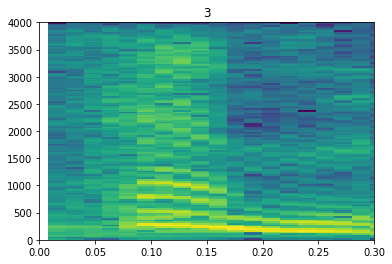

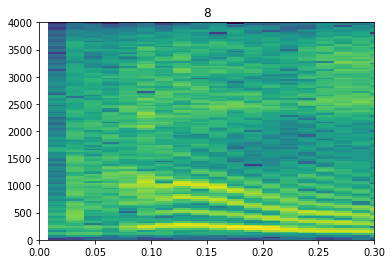

'\n시간과 주파수를 보여주는 그림.\n소리에서 중요한 것: 주파수와 에너지 (주파수가 굉장히 중요함), Spectro gram에서 에너지가 어디에 분포되었는지에 따라 색상이 다름.\n노란색으로 갈수록 에너지가 많음, 검은색일수록 에너지가 적음.\n발생할 때 다양한 주파수가 포함이 되어있는데 에너지량을 통해 구분할 수 있다. 주파수를 분석할 때 중요하다.\n'

In [6]:

# zero.wav 음성 데이터의 spectrogram
sample_frequency, signalData = wavfile.read('/content/gdrive/My Drive/number/three.wav')

array_2D, frequency, time, _ = plt.specgram(signalData[:],Fs=sample_frequency)


plt.specgram(signalData[:], Fs=sample_frequency)
#정규화 된 데이터로 테스트

#plt.specgram(testdict['zero.wav']['samples'], Fs=sample_frequency)  #실패

#plt.specgram(normaldict['zero.wav']['samples'], Fs=sample_frequency) #성공

plt.axis([0, 0.3, 0, 4000])
plt.title('3')
plt.show()

sample_frequency, signalData = wavfile.read('/content/gdrive/My Drive/number/eight.wav')
plt.specgram(signalData[:], Fs=sample_frequency)

plt.axis([0, 0.3, 0, 4000])
plt.title('8')
plt.show()
#one.wav 음성 데이터의 spectrogram
'''
sample_frequency, signalData = wavfile.read('sample_data/one.wav')
plt.specgram(signalData[:], Fs=sample_frequency)
plt.axis([0, 0.355, 0, 4000])
plt.title('one.wav')
'''
'''
시간과 주파수를 보여주는 그림.
소리에서 중요한 것: 주파수와 에너지 (주파수가 굉장히 중요함), Spectro gram에서 에너지가 어디에 분포되었는지에 따라 색상이 다름.
노란색으로 갈수록 에너지가 많음, 검은색일수록 에너지가 적음.
발생할 때 다양한 주파수가 포함이 되어있는데 에너지량을 통해 구분할 수 있다. 주파수를 분석할 때 중요하다.
'''

# 정규화 된 데이터 시각화(절대값)


zero.wav
0.1930506621309683
one.wav
0.0015876165905933718
two.wav
0.0059271803556308214
three.wav
0.05256290773532153
four.wav
0.020743479153830357
five.wav
0.0015658641612840086
six.wav
0.0045632333767926985
seven.wav
0.007251264755480607
eight.wav
0.018459069020866775
nine.wav
0.015073009891662742


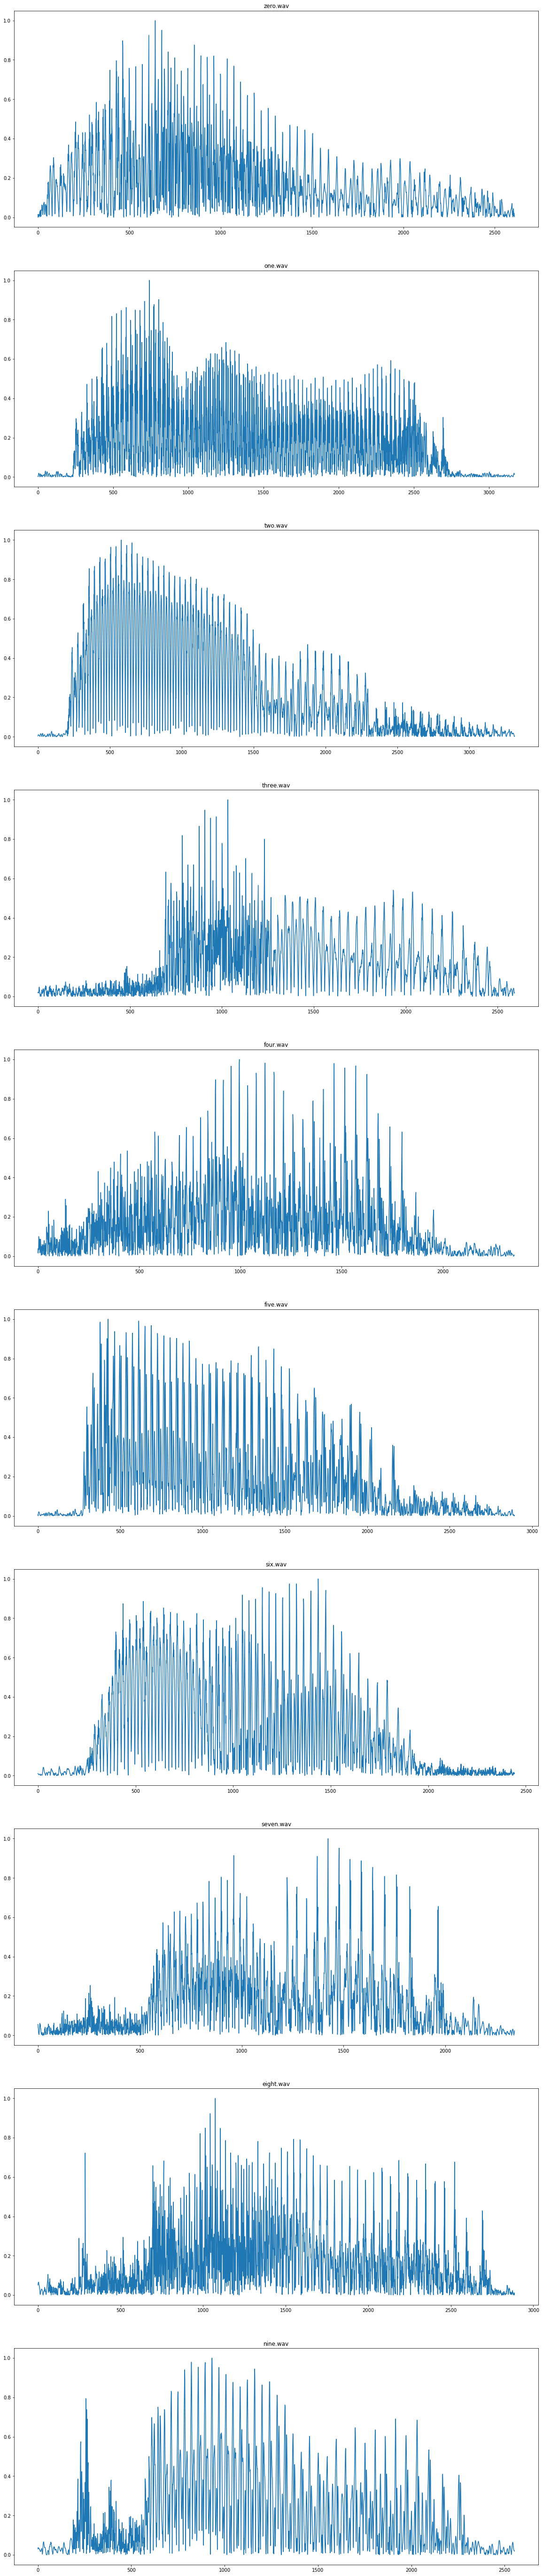

In [7]:

plt.figure(figsize=(20,100))
#0.04

#절대값 씌우기
index = 1
for i in files:
  
  a=normaldict[i]['samples']
  plt.subplot(10, 1, index)

  for j in range (len(a)):
    
    a[j] = abs(a[j])
  

  

  plt.plot(a)
  #파일의 이름 출력
  print(i)
  #시간의 지점이 100일때의 주파수의 크기
  print(a[100])
  
  #ylim([0, 0.1])
  plt.title(i)
  index= index + 1
        

# 잡음제거(cutted_dict= 잡음제거 완료된 데이터)

In [0]:
x_start = list()
x_end = list()
list_len = list()
#임계값
set_value = 0.04

#파일의 x축 길이
for i in files:
  a=normaldict[i]['samples']
  list_len.append(len(a))
print("파일의 x축 길이 리스트:",list_len)

# x축의 시작점
for i in files:
  a=normaldict[i]['samples']
  
  for j in range (len(a)):    
    if  a[j] > set_value:
      x_start.append(j)      
      break

print("파일의 x축 시작점 리스트:",x_start)

# x축의 끝점
for i in files:
  a=normaldict[i]['samples']
  j=1  
  for j in range (len(a)):    
    if  a[-j] > set_value:
      x_end.append(len(a)-j)      
      break

print("파일의 x축 끝점 리스트:",x_end)

cutted_file = list()
cutted_dict = dict(normaldict)
j=0

for i in files:
  a=normaldict[i]['samples']
  
  #x축 시작점과 x축 끝점을 슬라이싱  
  cutted_file = a[ x_start[j] : x_end[j] ]  
  #normaldict에 업데이트   
  cutted_dict.update({i:{'sample_rate':8000, 'samples':cutted_file}})
  cutted_file = list()
  j= j+1

print("잡음제거 완료")

파일의 x축 길이 리스트: [2610, 3172, 3316, 2593, 2355, 2895, 2443, 2340, 2887, 2554]
파일의 x축 시작점 리스트: [21, 235, 206, 6, 4, 275, 27, 0, 0, 27]
파일의 x축 끝점 리스트: [2603, 2726, 3224, 2588, 2282, 2795, 2331, 2340, 2887, 2547]
잡음제거 완료


# 음성 출력

In [0]:

# 영
IPython.display.Audio(data=cutted_samples[0], rate=8000)


# 퓨리에변환1(KJ)

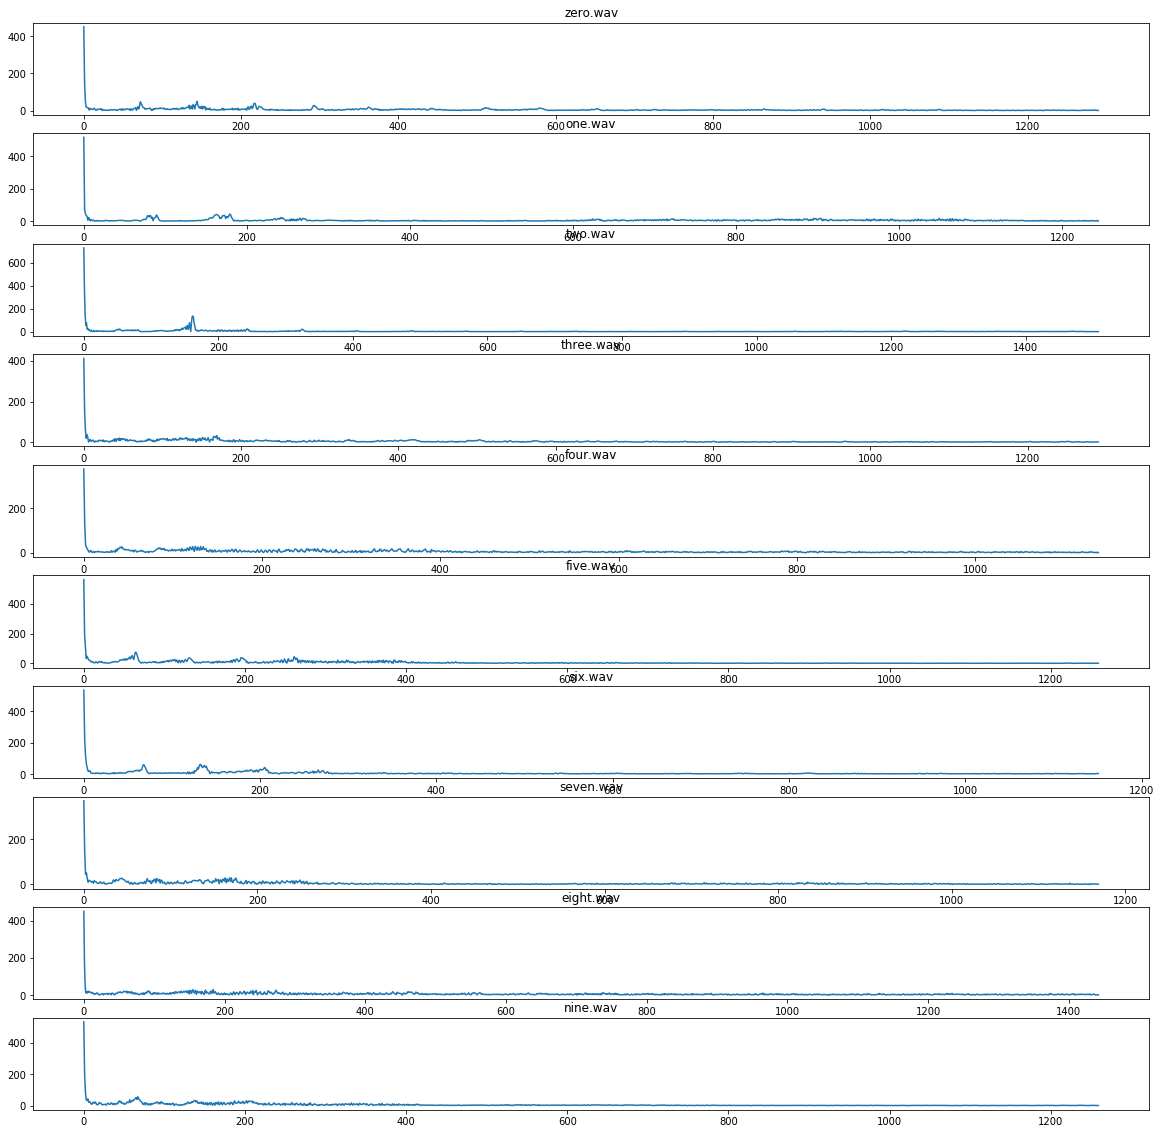

In [0]:
# fft (scipy)
from scipy.fftpack import fft, ifft

plt.figure(figsize=(20, 20))
for i, (file_name, value) in enumerate(cutted_dict.items()):
    
    plt.subplot(10, 1, i + 1)
    a = fft(value['samples'])
    plt.plot(abs(a[:len(a)//2]))
    plt.title(file_name)

# 퓨리에 변환2(JW)

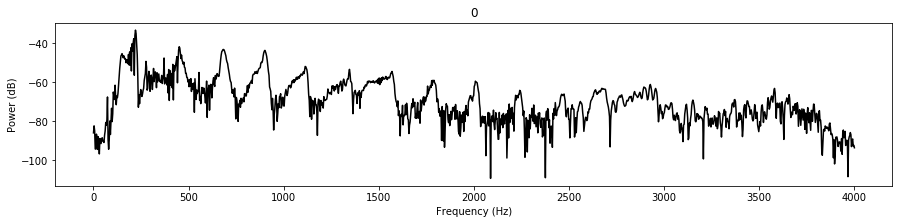

In [33]:
#fft

'''
음성 등의 파형을 기본 주파수(기본음)와 그 정배수의 각 주파수(각 배음)로 분해하는 것. 
간단하게 말하면 어떤 파(波) 중에서 어느 주파수 성분이 얼마만큼 포함되어 있는지를 계산하는 방법. 
모든 파형은 이 푸리에 변환을 통해 기본파와 고주파의 합으로 나타낼 수 있다. 
따라서 하나의 파형이 이어지면 그 파형이 어떤 주파수 성분으로 구성되어 있는지를 이 푸리에 변환을 통해 알 수 있다.

또 기본파나 고조파도 파형으로서는 정현파(正弦波)이기 때문에 아무리 복잡한 파형이라도 각각의 주파수의 정현파 합성을 통해 만들어지는 것을 푸리에 변환이 나타내고 있다. 
결국 기본파와 고조파의 주파수 및 진폭을 알 수 있다면, 이것을 합성해서 하나의 파형으로 나타낼 수도 있다. 이것을 역푸리에 변환 또는 푸리에 합성이라고 한다.



'''
from pylab import*
import numpy as np

#def waveFeature(wfile):
#    sampFreq, snd = wavfile.read(wfile)
def waveFeature(sample_rate,list):
    sampFreq, snd = sample_rate,list
      
    snd = snd / (2.**15)    
    
    n = len(snd) 
    
    p = fft(snd) # take the fourier transform 
    
    nUniquePts = int(ceil((n+1)/2.0))
    p = p[0:nUniquePts]
    p = abs(p)
    p = p / float(n) # scale by the number of points so that
                 # the magnitude does not depend on the length 
                 # of the signal or on its sampling frequency 
        
    p = p**2  # square it to get the power 

    # multiply by two (see technical document for details)
    # odd nfft excludes Nyquist point
    
    if n % 2 > 0: # we've got odd number of points fft
        p[1:len(p)] = p[1:len(p)] * 2
    else:
        p[1:len(p) -1] = p[1:len(p) - 1] * 2 # we've got even number of points fft

    freqArray = arange(0, nUniquePts, 1.0) * (sampFreq / n)
    #freqArray = freqArray / 1000
    
    p=10*log10(p)
    return freqArray, p
  

'''
plt.figure(figsize=(15, 3)) << 15,3 부분에 해당하는 인자를 조정하면 그래프의 크기를 조정할 수 있음
freqArray, p=waveFeature('sample_data/three.wav') <<  '경로' 부분에 해당하는 인자를 조정할 수 있음
xlim([3000 ,4000]) << 인자를 통한 x축의 범위 조정할 수 있음
ylim([-110 ,-40]) << 인자를 통한 y축의 범위 조정할 수 있음
'''


#주파수 뽑기
#print("주파수:", freqArray)
#print(freqArray.shape)
#print("power:", p)
#print(p.shape)

#특정 주파수 뽑기
#print(freqArray[100])
#print(p[100])

plt.figure(figsize=(15, 3))

freqArray, p=waveFeature(8000, sample_dict['zero.wav']['samples'])
#freqArray, p=waveFeature('/content/gdrive/My Drive/number/seven.wav')
plot(freqArray, p, color='k')
xlabel('Frequency (Hz)')
ylabel('Power (dB)')
#xlim([0 ,4000])
#ylim([-110 ,-40])
plt.title('0')
plt.show()

#시작점
freqArray_start = 0
#끝점
freqArray_end = 0

for i in range(0,len(freqArray)):
  if(freqArray[i] > 500):
    freqArray_start = i
    break

for i in range(0,len(freqArray)):
  if(freqArray[i] > 1500):
    freqArray_end = i
    break

sum = 0.0
for i in range(freqArray_start,freqArray_end):
  sum=p[i] + sum


# 전체그래프(0,1,6 비교)

주파수 0,1,6 의 500~1500 범위의 저주파 구간의 평균 크기를 비교해보았을때

0의 경우 -62.4

1의 경우 -73.8

6의 경우 -68.4

따라서 -65를 기준으로 0과 1,6을 나눔

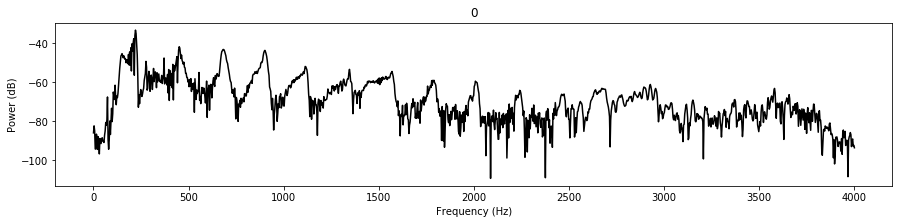

평균값:  -62.42286535118425
0 입니다 
범위 326


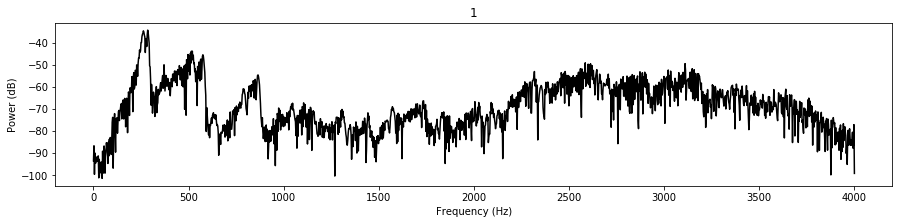

평균값:  -73.80659423619501
1 또는 6입니다
범위 396


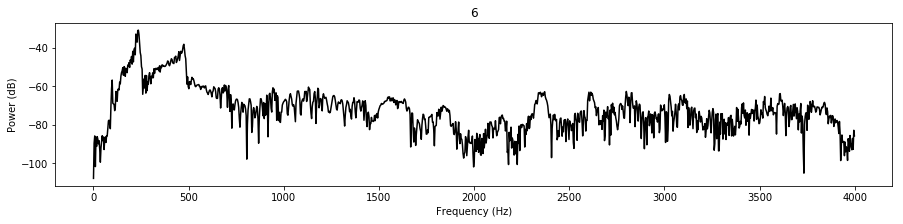

평균값:  -68.48242704261014
1 또는 6입니다
범위 306


In [0]:
plt.figure(figsize=(15, 3))

freqArray, p=waveFeature(8000, sample_dict['zero.wav']['samples'])
#freqArray, p=waveFeature('/content/gdrive/My Drive/number/seven.wav')
plot(freqArray, p, color='k')
xlabel('Frequency (Hz)')
ylabel('Power (dB)')
#xlim([0 ,4000])
#ylim([-110 ,-40])
plt.title('0')
plt.show()

#시작점
freqArray_start = 0
#끝점
freqArray_end = 0

for i in range(0,len(freqArray)):
  if(freqArray[i] > 500):
    freqArray_start = i
    break

for i in range(0,len(freqArray)):
  if(freqArray[i] > 1500):
    freqArray_end = i
    break

sum = 0.0
for i in range(freqArray_start,freqArray_end):
  sum=p[i] + sum

average = sum/(freqArray_end-freqArray_start)
print("평균값: ", average)  

if average > -65:

  print("0 입니다 ")
else:
  print("1 또는 6입니다")

print("범위",abs(freqArray_start-freqArray_end))

plt.figure(figsize=(15, 3))
freqArray, p=waveFeature(8000, sample_dict['one.wav']['samples'])
#freqArray, p=waveFeature('/content/gdrive/My Drive/number/eight.wav')
plot(freqArray, p, color='k')
xlabel('Frequency (Hz)')
ylabel('Power (dB)')
#xlim([1000 ,2000])
#ylim([-110 ,-40])
plt.title('1')
plt.show()

for i in range(0,len(freqArray)):
  if(freqArray[i] > 500):
    freqArray_start = i
    break

for i in range(0,len(freqArray)):
  if(freqArray[i] > 1500):
    freqArray_end = i
    break

sum = 0.0
for i in range(freqArray_start,freqArray_end):
  sum=p[i] + sum

average = sum/(freqArray_end-freqArray_start)
print("평균값: ", average)  

if average > -65:
  print("0 입니다 ")
else:
  print("1 또는 6입니다")

print("범위",abs(freqArray_start-freqArray_end))

plt.figure(figsize=(15, 3))
freqArray, p=waveFeature(8000, sample_dict['six.wav']['samples'])
#freqArray, p=waveFeature('/content/gdrive/My Drive/number/seven.wav')
plot(freqArray, p, color='k')
xlabel('Frequency (Hz)')
ylabel('Power (dB)')
#xlim([0 ,4000])
#ylim([-110 ,-40])
plt.title('6')
plt.show()

for i in range(0,len(freqArray)):
  if(freqArray[i] > 500):
    freqArray_start = i
    break

for i in range(0,len(freqArray)):
  if(freqArray[i] > 1500):
    freqArray_end = i
    break

sum = 0.0
for i in range(freqArray_start,freqArray_end):
  sum=p[i] + sum

average = sum/(freqArray_end-freqArray_start)
print("평균값: ", average)  

if average > -65:
  print("0 입니다 ")
else:
  print("1 또는 6입니다")
  
print("범위",abs(freqArray_start-freqArray_end))


# 전체그래프(1,6 비교)
3000~4000 Hz구간에서 1이 더 고주파이다

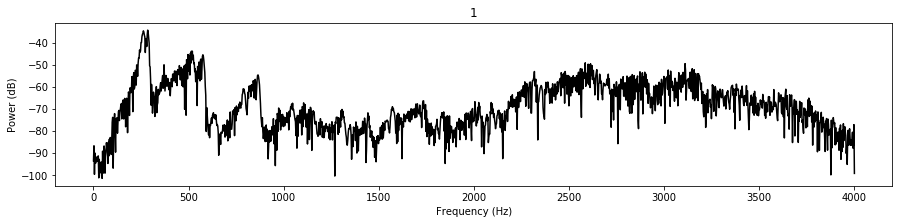

평균값:  -61.702358642194405
1 입니다 
-396


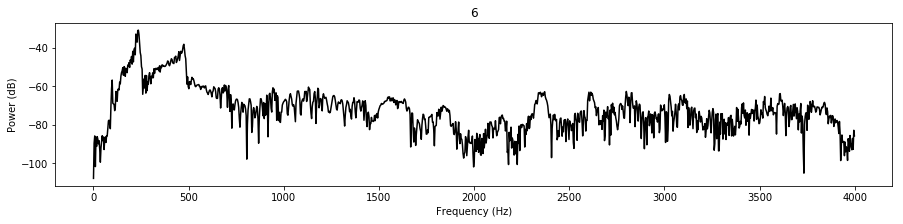

평균값:  -75.64620415607043
6 입니다
-305


In [0]:

plt.figure(figsize=(15, 3))
freqArray, p=waveFeature(8000, sample_dict['one.wav']['samples'])
#freqArray, p=waveFeature('/content/gdrive/My Drive/number/eight.wav')
plot(freqArray, p, color='k')
xlabel('Frequency (Hz)')
ylabel('Power (dB)')
#xlim([1000 ,2000])
#ylim([-110 ,-40])
plt.title('1')
plt.show()

for i in range(0,len(freqArray)):
  if(freqArray[i] > 2500):
    freqArray_start = i
    break

for i in range(0,len(freqArray)):
  if(freqArray[i] > 3500):
    freqArray_end = i
    break

sum = 0.0
for i in range(freqArray_start,freqArray_end):
  sum=p[i] + sum

average = sum/(freqArray_end-freqArray_start)
print("평균값: ", average)  

if average > -68:
  print("1 입니다 ")
else:
  print("6 입니다")

print("범위",abs(freqArray_start-freqArray_end))

plt.figure(figsize=(15, 3))
freqArray, p=waveFeature(8000, sample_dict['six.wav']['samples'])
#freqArray, p=waveFeature('/content/gdrive/My Drive/number/seven.wav')
plot(freqArray, p, color='k')
xlabel('Frequency (Hz)')
ylabel('Power (dB)')
#xlim([0 ,4000])
#ylim([-110 ,-40])
plt.title('6')
plt.show()

for i in range(0,len(freqArray)):
  if(freqArray[i] > 2500):
    freqArray_start = i
    break

for i in range(0,len(freqArray)):
  if(freqArray[i] > 3500):
    freqArray_end = i
    break

sum = 0.0
for i in range(freqArray_start,freqArray_end):
  sum=p[i] + sum

average = sum/(freqArray_end-freqArray_start)
print("평균값: ", average)  

if average > -68:
  print("1 입니다 ")
else:
  print("6 입니다")
print("범위",abs(freqArray_start-freqArray_end))

# 전체그래피(7,8 비교)
1000Hz가 8이 더 높음



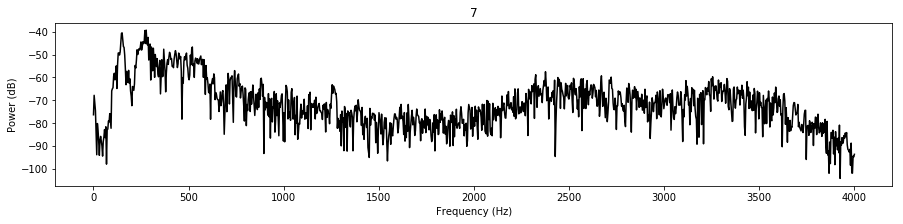

평균값:  -73.24376133193819
7 입니다 
범위 117


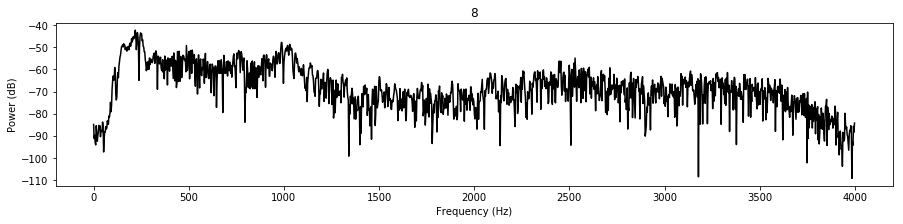

평균값:  -59.662140287690626
8 입니다
범위 145


In [0]:

plt.figure(figsize=(15, 3))
freqArray, p=waveFeature(8000, sample_dict['seven.wav']['samples'])
#freqArray, p=waveFeature('/content/gdrive/My Drive/number/eight.wav')
plot(freqArray, p, color='k')
xlabel('Frequency (Hz)')
ylabel('Power (dB)')
#xlim([1000 ,2000])
#ylim([-110 ,-40])
plt.title('7')
plt.show()

for i in range(0,len(freqArray)):
  if(freqArray[i] > 800):
    freqArray_start = i
    break

for i in range(0,len(freqArray)):
  if(freqArray[i] > 1200):
    freqArray_end = i
    break

sum = 0.0
for i in range(freqArray_start,freqArray_end):
  sum=p[i] + sum

average = sum/(freqArray_end-freqArray_start)
print("평균값: ", average)  

if average > -66:
  print("8 입니다")
  
else:  
  print("7 입니다 ")

print("범위",abs(freqArray_start-freqArray_end))

plt.figure(figsize=(15, 3))
freqArray, p=waveFeature(8000, sample_dict['eight.wav']['samples'])
#freqArray, p=waveFeature('/content/gdrive/My Drive/number/seven.wav')
plot(freqArray, p, color='k')
xlabel('Frequency (Hz)')
ylabel('Power (dB)')
#xlim([0 ,4000])
#ylim([-110 ,-40])
plt.title('8')
plt.show()

for i in range(0,len(freqArray)):
  if(freqArray[i] > 800):
    freqArray_start = i
    break

for i in range(0,len(freqArray)):
  if(freqArray[i] > 1200):
    freqArray_end = i
    break

sum = 0.0
for i in range(freqArray_start,freqArray_end):
  sum=p[i] + sum

average = sum/(freqArray_end-freqArray_start)
print("평균값: ", average)  

if average > -66:
  print("8 입니다")  
else:
  print("7 입니다 ")
print("범위",abs(freqArray_start-freqArray_end))

# 데이터 30개 테스트(7,8 구분)

In [38]:
x= np.load('/content/gdrive/My Drive/테스트 데이터(npy)/new_data.npy')
print(x.shape)
y= np.load('/content/gdrive/My Drive/테스트 데이터(npy)/new_label.npy')
print(y.shape)

for i in range(240,270):  
  freqArray, p=waveFeature(8000, x[i])
  for i in range(0,len(freqArray)):
    if(freqArray[i] > 800):
      freqArray_start = i
      break

  for i in range(0,len(freqArray)):
    if(freqArray[i] > 1200):
      freqArray_end = i
      break

  sum = 0.0
  for i in range(freqArray_start,freqArray_end):
    sum=p[i] + sum

  average = sum/(freqArray_end-freqArray_start)
  print("평균값: ", average)  

  if average > -70:
    print("8 입니다")
  
  else:  
    print("7 입니다 ")

  print("범위",abs(freqArray_start-freqArray_end))

 # 8의 데이터 -68 ~ -59
 # 7의 데이터 -83 ~ -74

(300, 4000)
(300,)
평균값:  -68.57066202668624
8 입니다
범위 200
평균값:  -68.57066202668624
8 입니다
범위 200
평균값:  -68.57066202668624
8 입니다
범위 200
평균값:  -66.98703710573376
8 입니다
범위 200
평균값:  -66.98703710573376
8 입니다
범위 200
평균값:  -66.98703710573376
8 입니다
범위 200
평균값:  -65.64810131312157
8 입니다
범위 200
평균값:  -65.64810131312157
8 입니다
범위 200
평균값:  -65.64810131312157
8 입니다
범위 200
평균값:  -64.48826237356784
8 입니다
범위 200
평균값:  -64.48826237356784
8 입니다
범위 200
평균값:  -64.48826237356784
8 입니다
범위 200
평균값:  -63.46521192462018
8 입니다
범위 200
평균값:  -63.46521192462018
8 입니다
범위 200
평균값:  -63.465211924620164
8 입니다
범위 200
평균값:  -62.55006211340664
8 입니다
범위 200
평균값:  -62.55006211340664
8 입니다
범위 200
평균값:  -62.55006211340664
8 입니다
범위 200
평균값:  -61.722208410242146
8 입니다
범위 200
평균값:  -61.72220841024214
8 입니다
범위 200
평균값:  -61.722208410242146
8 입니다
범위 200
평균값:  -60.96643719245416
8 입니다
범위 200
평균값:  -60.96643719245416
8 입니다
범위 200
평균값:  -60.96643719245416
8 입니다
범위 200
평균값:  -60.27119506726993
8 입니다
범위 200
평균값:  -60.27119506726993
8 입

# 데이터 30개 테스트(0 / 1,6 구분)

In [66]:
x= np.load('/content/gdrive/My Drive/테스트 데이터(npy)/new_data.npy')
print(x.shape)
y= np.load('/content/gdrive/My Drive/테스트 데이터(npy)/new_label.npy')
print(y.shape)

count = 0

for i in range(180,210):
  print(i)
  freqArray, p=waveFeature(8000, x[i])
  #시작점
  freqArray_start = 0
  #끝점
  freqArray_end = 0

  for j in range(0,len(freqArray)):
    if(freqArray[j] > 800):
      freqArray_start = j
      break

  for j in range(0,len(freqArray)):
    if(freqArray[j] > 1000):
      freqArray_end = j
      break

  sum = 0.0
  for j in range(freqArray_start,freqArray_end):
    sum=p[j] + sum

  average = sum/(freqArray_end-freqArray_start)
  print("평균값: ", average)  

  if average > -71:
    print("0 입니다")
    
  else:
    print("1 또는 6입니다")

  print("범위",abs(freqArray_start-freqArray_end))
  
#0의 데이터 -70 ~ -61
#1의 데이터 -80 ~ -71.6
#6의 데이터 -81 ~ -72

(300, 4000)
(300,)
180
평균값:  -81.80714903844446
6입니다
범위 100
181
평균값:  -81.80714903844446
6입니다
범위 100
182
평균값:  -81.80714903844446
6입니다
범위 100
183
평균값:  -80.22352411749195
6입니다
범위 100
184
평균값:  -80.22352411749195
6입니다
범위 100
185
평균값:  -80.22352411749195
6입니다
범위 100
186
평균값:  -78.88458832487966
6입니다
범위 100
187
평균값:  -78.88458832487966
6입니다
범위 100
188
평균값:  -78.88458832487964
6입니다
범위 100
189
평균값:  -77.72474938532594
6입니다
범위 100
190
평균값:  -77.72474938532592
6입니다
범위 100
191
평균값:  -77.72474938532594
6입니다
범위 100
192
평균값:  -76.70169893637834
6입니다
범위 100
193
평균값:  -76.70169893637834
6입니다
범위 100
194
평균값:  -76.70169893637832
6입니다
범위 100
195
평균값:  -75.78654912516483
6입니다
범위 100
196
평균값:  -75.78654912516483
6입니다
범위 100
197
평균값:  -75.78654912516483
6입니다
범위 100
198
평균값:  -74.95869542200032
6입니다
범위 100
199
평균값:  -74.95869542200032
6입니다
범위 100
200
평균값:  -74.95869542200033
6입니다
범위 100
201
평균값:  -74.20292420421228
6입니다
범위 100
202
평균값:  -74.20292420421231
6입니다
범위 100
203
평균값:  -74.2029242042123
6입니다
범위 10

# 데이터 30개 테스트(1,6 구분)

In [65]:
x= np.load('/content/gdrive/My Drive/테스트 데이터(npy)/new_data.npy')
print(x.shape)
y= np.load('/content/gdrive/My Drive/테스트 데이터(npy)/new_label.npy')
print(y.shape)



for i in range(180,210):
  print(i)
  freqArray, p=waveFeature(8000, x[i])
  #시작점
  freqArray_start = 0
  #끝점
  freqArray_end = 0

  for j in range(0,len(freqArray)):
    if(freqArray[j] > 2500):
      freqArray_start = j
      break

  for j in range(0,len(freqArray)):
    if(freqArray[j] > 3500):
      freqArray_end = j
      break

  sum = 0.0
  for j in range(freqArray_start,freqArray_end):
    sum=p[j] + sum

  average = sum/(freqArray_end-freqArray_start)
  print("평균값: ", average)  

  if average > -70:
    print("1 입니다 ")
  else:
    print("6 입니다")
  print("범위",abs(freqArray_start-freqArray_end))
  

#1의 데이터 -69 ~ -60
#6의 데이터 -86 ~ -72\

(300, 4000)
(300,)
180
평균값:  -86.03718536441166
6 입니다
범위 500
181
평균값:  -86.03718536441166
6 입니다
범위 500
182
평균값:  -86.03718536441164
6 입니다
범위 500
183
평균값:  -84.45356044345917
6 입니다
범위 500
184
평균값:  -84.45356044345917
6 입니다
범위 500
185
평균값:  -84.45356044345918
6 입니다
범위 500
186
평균값:  -83.11462465084692
6 입니다
범위 500
187
평균값:  -83.1146246508469
6 입니다
범위 500
188
평균값:  -83.11462465084693
6 입니다
범위 500
189
평균값:  -81.95478571129316
6 입니다
범위 500
190
평균값:  -81.95478571129317
6 입니다
범위 500
191
평균값:  -81.95478571129316
6 입니다
범위 500
192
평균값:  -80.9317352623455
6 입니다
범위 500
193
평균값:  -80.93173526234551
6 입니다
범위 500
194
평균값:  -80.9317352623455
6 입니다
범위 500
195
평균값:  -80.01658545113206
6 입니다
범위 500
196
평균값:  -80.01658545113204
6 입니다
범위 500
197
평균값:  -80.01658545113207
6 입니다
범위 500
198
평균값:  -79.18873174796758
6 입니다
범위 500
199
평균값:  -79.18873174796758
6 입니다
범위 500
200
평균값:  -79.18873174796758
6 입니다
범위 500
201
평균값:  -78.43296053017961
6 입니다
범위 500
202
평균값:  -78.43296053017961
6 입니다
범위 500
203
평균값:  -78.4329